<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فعالیت‌بدنی‌بندی</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌های <b>تشخیص فعالیت انسانی (HAR)</b> مجموعه‌ای از داده‌های حسگر هستند که هدف آنها دسته‌بندی و شناسایی فعالیت‌های مختلف انسانی بر اساس الگوهای موجود در خوانش‌های حسگر است. در تحقیقات یادگیری ماشین و داده‌کاوی از این مجموعه‌داده‌ها برای توسعه‌ی الگوریتم‌ها و مدل‌های سیستم‌های تشخیص فعالیت استفاده می‌شوند. ویژگی‌های مجموعه‌داده‌های HAR معمولاً برگرفته از داده‌های حسگرهای مختلف مانند شتاب‌سنج، ژیروسکوپ و مغناطیس‌سنج است. این سنسورها معمولاً در گوشی‌های هوشمند، ساعت‌های هوشمند و دستگاه‌های پوشیدنی یافت می‌شوند. حسگرها داده‌های مربوط به حرکت و جهت‌گیری دستگاه و همچنین محیط اطراف را ثبت می‌کنند. در صورت علاقه، می‌توانید نمونه‌ای از ثبت این داده‌ها را در <a href="https://www.youtube.com/watch?v=XOEN9W05_4A">این ویدیو</a> مشاهده کنید. این اندازه‌گیری‌ها در فواصل زمانی منظم گرفته می‌شوند و به‌عنوان داده‌های سری زمانی نشان داده می‌شوند. هدف مجموعه‌داده‌های HAR شناسایی و دسته‌بندی دقیق فعالیت‌های انسانی خاص است. این فعالیت‌ها می توانند بسته به کاربرد یا زمینه‌ی مورد مطالعه متفاوت باشند. نمونه‌هایی از فعالیت‌های رایج شناخته‌شده عبارتند از راه رفتن، دویدن، ایستادن، نشستن، بالا رفتن از پله‌ها و فعالیت‌های مرتبط با ورزش یا تناسب اندام. هدف، ساخت مدل‌های پیش‌بینی‌کننده است تا بتوانند به‌طور خودکار این فعالیت‌ها را بر اساس الگوهای آشکار یا پنهان موجود در داده‌های حسگر تشخیص دهند و بین‌شان تمایز قائل شوند.
<br>
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌ای که در اختیار شما قرار گرفته به‌ازای هر داده‌ای که ثبت شده نوع فعالیت آن در ستون <code>Activity_Name</code> نوشته شده است. انواع فعالیت موجود در این مجموعه‌داده عبارتند از:

</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| مقدار | نوع فعالیت |
| :---: | :---: |
| Walking | راه رفتن |
| Walking_Upstairs | بالا رفتن از پله‌ها |
| Walking_Downstairs | پایین رفتن از پله‌ها |
| Sitting | نشستن |
| Standing | ایستادن |
| Laying | خوابیدن |

</font>
</p>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا مجموعه‌داده‌های آموزش (<code>train</code>) و آزمون (<code>test</code>) از فایل‌های موجود در پوشه بخوانید. البته نیازی به ستون <code>subject</code> نیست. در صورت تمایل می‌توانید بخشی از مجموعه‌ی آموزشی را جدا کرده و برای اعتبارسنجی (<code>validation</code>) استفاده کنید.
    </font>
</p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv').drop('Subject', axis=1)
test = pd.read_csv('test.csv')
validation = train.sample(frac=0.2, random_state=1)
train = train.drop(validation.index)

In [3]:
print(train.shape)
print(test.shape)

(5882, 562)
(2947, 561)


In [4]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,Standing
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,Standing


In [5]:
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.283669,-0.015857,-0.059881,-0.973736,-0.899287,-0.782522,-0.976986,-0.894329,-0.785570,-0.895825,...,0.223438,-0.252492,-0.658040,0.003614,0.096807,0.451286,0.493474,-0.852602,0.188326,0.067392
1,0.322557,-0.039917,-0.082557,-0.355588,-0.337817,-0.265232,-0.397431,-0.341815,-0.276091,-0.073071,...,0.427286,-0.433622,-0.781109,-0.375235,-0.345779,0.428791,-0.359078,-0.664690,0.265582,0.181672
2,0.294853,-0.010700,-0.100636,-0.980507,-0.895418,-0.963306,-0.980855,-0.884619,-0.964184,-0.927680,...,0.337037,-0.439849,-0.723350,-0.392573,0.320364,0.554949,-0.501292,-0.857665,0.188949,-0.021815
3,0.285264,-0.015595,-0.150264,-0.236935,0.523830,-0.378750,-0.297927,0.478829,-0.384961,0.133768,...,0.361520,0.805276,0.721432,-0.042795,0.299331,0.584471,0.817918,-0.711628,0.297052,0.006109
4,0.311611,-0.015282,-0.109654,-0.932390,-0.983798,-0.971810,-0.926542,-0.981748,-0.969975,-0.888423,...,0.191532,0.049477,-0.254858,-0.022340,0.000328,-0.173259,-0.466109,0.592952,-0.416970,-0.593468


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا پیشنهاد می‌کنیم کمی به بررسی دقیق‌تر و آماری داده‌هایی که در دسترس‌تان است بپردازید و در صورت علاقه نمودارهایی را جهت بررسی توزیع‌های داده رسم کنید.
<span style="color:orange">(اختیاری)</span>
</font>
</p>

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,5882.0,0.274437,0.071795,-1.000000,0.263383,0.277239,0.288721,1.000000
tBodyAcc-mean()-Y,5882.0,-0.017235,0.041877,-1.000000,-0.024388,-0.017142,-0.010630,1.000000
tBodyAcc-mean()-Z,5882.0,-0.109102,0.058342,-1.000000,-0.120942,-0.108767,-0.097926,1.000000
tBodyAcc-std()-X,5882.0,-0.604841,0.449745,-1.000000,-0.992738,-0.945957,-0.239846,0.899922
tBodyAcc-std()-Y,5882.0,-0.509403,0.504693,-0.999873,-0.978030,-0.849266,-0.032577,0.916238
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",5882.0,0.012573,0.607341,-1.000000,-0.476343,0.010990,0.510560,0.998341
"angle(tBodyGyroJerkMean,gravityMean)",5882.0,-0.005002,0.473720,-1.000000,-0.367848,-0.000784,0.354037,0.991288
"angle(X,gravityMean)",5882.0,-0.488955,0.512153,-1.000000,-0.813209,-0.708089,-0.506591,0.977344
"angle(Y,gravityMean)",5882.0,0.057575,0.297990,-1.000000,-0.020479,0.180879,0.248027,0.478157


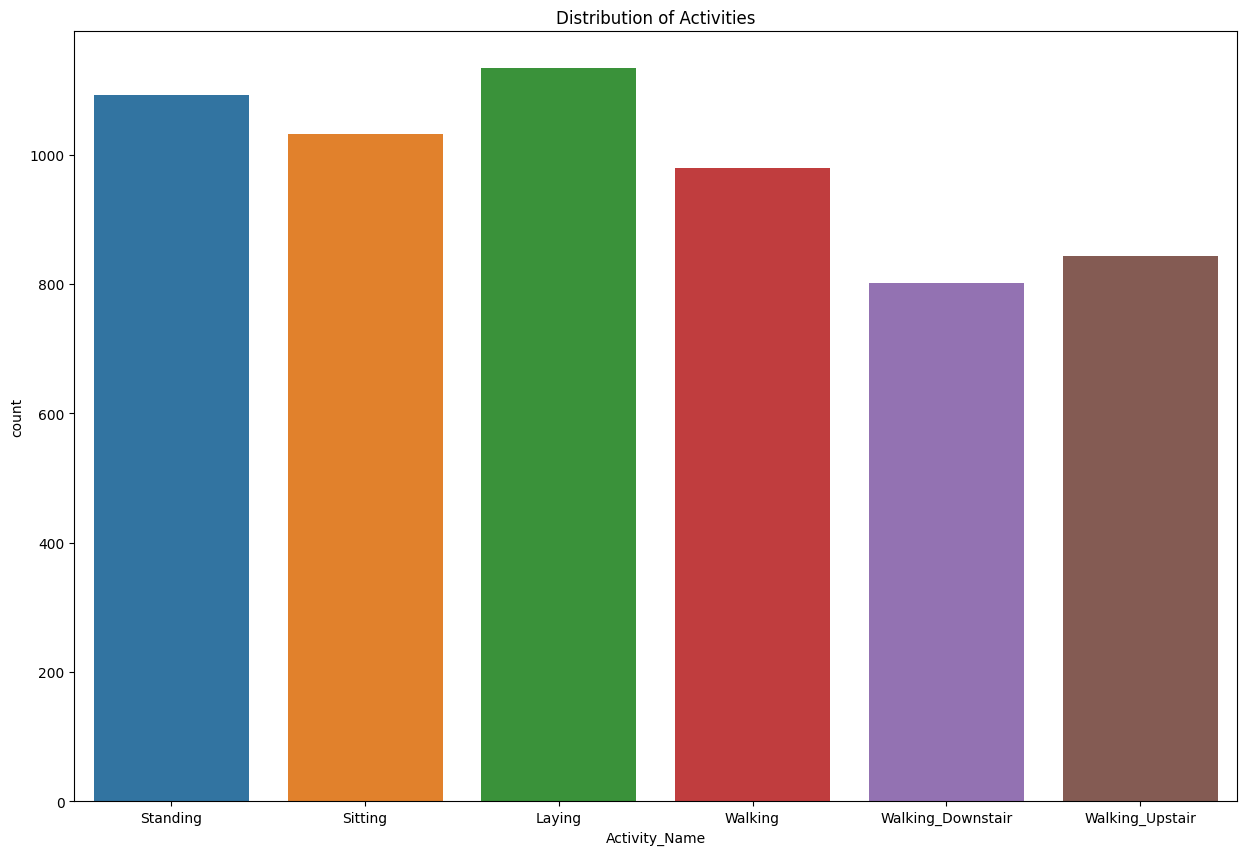

In [7]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='Activity_Name', data=train)
plt.title("Distribution of Activities")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مهندسی ویژگی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
طبق بررسی‌هایی که از داده‌ها داشته‌اید یا جهت دست‌یابی به عملکرد بهتر در مدل‌های پیش‌بینی‌کننده‌ی خود ممکن است به مهندسی ویژگی‌‌ها (کدگذاری متغیر هدف،‌ حذف ویژگی‌ها، تغییر نوع ویژگی‌ها، ساخت ویژگی جدید، تغییر مقیاس و غیره) نیاز داشته باشید. در این‌صورت می‌توانید در این قسمت از هر روش یا ابزاری که مناسب می‌دانید به‌منظور مهندسی ویژگی‌ها استفاده کنید.
</font>
</p>

In [8]:
groups = []
drop_cols = []

for col in train.columns:
    if col.endswith('-X') or col.endswith('-Y') or col.endswith('-Z'):
        groups.append(col[:-2])

groups = set(groups)

for i in groups:
    col_x = i+'-X'
    col_y = i+'-Y'
    col_z = i+'-Z'
    if col_x in train.columns and col_y in train.columns and col_z in train.columns:
        train[f'{i}_value'] = np.sqrt(train[col_x]**2 + train[col_y]**2 + train[col_z]**2)
        drop_cols.extend([col_x, col_y, col_z])

train.drop(drop_cols, axis=1, inplace=True)

train.shape

(5882, 410)

In [9]:
features = train.drop(('Activity_Name'), axis=1)
target = train['Activity_Name']

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌توانید با استفاده از الگوریتم‌های یادگیری ماشین، مدلی آموزش دهید که با گرفتن مقادیر ویژگی‌های دریافتی از سنسورها، نوع فعالیت در حال انجام را پیش‌بینی کند.
در این قسمت از شما می‌خواهیم از الگوریتم درخت تصمیم یا الگوریتم های تجمیعی  استفاده کنید و ترکیب‌های مختلفی از هایپرپارامترهای مهم این الگوریتم هارا آزمایش کنید تا بهترین مدل را برای پیش‌بینی فعالیت‌های انسانی انتخاب کنید. در این قسمت می‌توانید از کتابخانه‌ی <code>sklearn</code> استفاده کنید و برای جست‌وجوی هایپرپارامترها می‌توانید از روشی همچون Grid Search استفاده کنید. منطقی است که برای پیدا کردن بهترین ترکیب هایپرپارامتر نیاز به مجموعه‌ی اعتبارسنجی یا استفاده از روش‌هایی مانند Cross Validation دارید.
</font>
</p>

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model_dec_tree = DecisionTreeClassifier(random_state=1)
param_grid = {'max_depth': range(1, 10, 1),
                'min_samples_leaf': range(1, 20, 2),
                'min_samples_split': range(2, 20, 2),
                'criterion': ["entropy", "gini"]}
grid_tree = GridSearchCV(model_dec_tree, param_grid, cv=5, verbose=True, n_jobs=-1)
grid_tree.fit(features, target)
print("best accuracy of Decision-Tree", grid_tree.best_score_)
print(grid_tree.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy of Decision-Tree 0.8769164080245522
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=9,
                       random_state=1)


In [ ]:
model_forest = RandomForestClassifier()
param_grid_f = {'n_estimators': [300, 500], 
                'max_depth': [None, 5, 10], 
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features' : ['sqrt', 'log2'],
                'criterion': ['gini', 'entropy']}
grid_forest = GridSearchCV(model_forest, param_grid_f, cv=5, verbose=True, n_jobs=-1)
grid_forest.fit(features, target)
print("best accuracy of Random Forest", grid_forest.best_score_)
print(grid_forest.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
best accuracy of Random Forest 0.926727844918766
RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=500)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نتایجی که بر روی هر ترکیب هایپرپارامتر به دست آورده‌اید،‌ تاثیر هر یک از هایپرپارامترها را بر روی عملکرد مدل چه می‌دانید؟ دلایل و تحلیل خود را در سلول زیر بنویسید:
<span style="color:red">(ضروری)</span>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
در تحلیل با مدل Desicion Tree از هایپر پارامترهای criterion = entropy و gini استفاده شده است که معیار انتخاب بهترین تقسیم در هر گره هستند. همچنین با استفاده از هایپر پارامتر max_depth که حداکثر عمق درخت است با مقدار مناسب از overfitting جلوگیری می شود و تاثیر زیادی در نهایی شدن درصد دقت مدل دارند.
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
در مدل Random Forest برعکس مدل Desicion Tree که یک درخت ساخته می شود صرفا، در این مدل به تعداد n_estimator تعریف شده درخت ایجاد میگردد تا پایدارترین مدل انتخاب گردد. در این مدل المان min_sample_split حداقل نمونه لازم برای تقسیم یه گره در هر درخت است که از overfitting مدل جلوگیری میکنم. این مسئله با هایپر پارامتر max_features نیز کنترل می گردد.
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
همانطور که از نتایج خروجی هر دو مدل مشخص است، مدل Random Forest درصد دقت بالاتری دارد که ناشی از تعداد درخت بالاتر این مدل است .
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال نتایج مدل نهایی انتخاب‌شده را هم بر روی مجموعه‌ی آموزشی و هم اعتبارسنجی گزارش کنید. برای ارزیابی از معیارهای Accuracy، Precision، Recall و F1-Score استفاده کنید. همچنین ماتریس درهم‌ریختگی (Confusion Matrix) را رسم نمایید.
</font>
</p>

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

best_model_tree = grid_tree.best_estimator_
target_pred_tree = best_model_tree.predict(features)

accuracy_train_tree = accuracy_score(target, target_pred_tree)
precision_train_tree = precision_score(target, target_pred_tree, average='weighted')
recall_train_tree = recall_score(target, target_pred_tree, average='weighted')
f1_scr_train_tree = f1_score(target, target_pred_tree, average='weighted')

print(f'Accuracy of Tree Desicion by Train = {accuracy_train_tree}')
print(f'Precision of Tree Desicion by Train = {precision_train_tree}')
print(f'Recall of Tree Desicion by Train = {recall_train_tree}')
print(f'F1 Score of Tree Desicion by Train = {f1_scr_train_tree}')

best_model_forest = grid_forest.best_estimator_
target_pred_forest = best_model_forest.predict(features)

accuracy_train_forest = accuracy_score(target, target_pred_forest)
precision_train_forest = precision_score(target, target_pred_forest, average='weighted')
recall_train_forest = recall_score(target, target_pred_forest, average='weighted')
f1_scr_train_forest = f1_score(target, target_pred_forest, average='weighted')

print(f'Accuracy of Random Forest by Train = {accuracy_train_forest}')
print(f'Precision of Random Forest by Train = {precision_train_forest}')
print(f'Recall of Random Forest by Train = {recall_train_forest}')
print(f'F1 Score of Random Forest by Train = {f1_scr_train_forest}')

Accuracy of Tree Desicion by Train = 0.972118327099626
Precision of Tree Desicion by Train = 0.9724862135744551
Recall of Tree Desicion by Train = 0.972118327099626
F1 Score of Tree Desicion by Train = 0.9721326737198439
Accuracy of Random Forest by Train = 1.0
Precision of Random Forest by Train = 1.0
Recall of Random Forest by Train = 1.0
F1 Score of Random Forest by Train = 1.0


In [23]:
groups = []
drop_cols = []

for col in validation.columns:
    if col.endswith('-X') or col.endswith('-Y') or col.endswith('-Z'):
        groups.append(col[:-2])

groups = set(groups)

for i in groups:
    col_x = i+'-X'
    col_y = i+'-Y'
    col_z = i+'-Z'
    if col_x in validation.columns and col_y in validation.columns and col_z in validation.columns:
        validation[f'{i}_value'] = np.sqrt(validation[col_x]**2 + validation[col_y]**2 + validation[col_z]**2)
        drop_cols.extend([col_x, col_y, col_z])

validation.drop(drop_cols, axis=1, inplace=True)
validation.shape

(1470, 410)

In [24]:
feature_val = validation.drop(('Activity_Name'), axis=1)
target_val = validation['Activity_Name']

target_pred_tree_val = best_model_tree.predict(feature_val)

accuracy_val_tree = accuracy_score(target_val, target_pred_tree_val)
precision_val_tree = precision_score(target_val, target_pred_tree_val, average='weighted')
recall_val_tree = recall_score(target_val, target_pred_tree_val, average='weighted')
f1_scr_val_tree = f1_score(target_val, target_pred_tree_val, average='weighted')

print(f'Accuracy of Tree Desicion by Validation = {accuracy_val_tree}')
print(f'Precision of Tree Desicion by Validation = {precision_val_tree}')
print(f'Recall of Tree Desicion by Validation = {recall_val_tree}')
print(f'F1 Score of Tree Desicion by Validation = {f1_scr_val_tree}')

target_pred_forest_val = best_model_forest.predict(feature_val)

accuracy_val_forest = accuracy_score(target_val, target_pred_forest_val)
precision_val_forest = precision_score(target_val, target_pred_forest_val, average='weighted')
recall_val_forest = recall_score(target_val, target_pred_forest_val, average='weighted')
f1_scr_val_forest = f1_score(target_val, target_pred_forest_val, average='weighted')

print(f'Accuracy of Random Forest by Validation = {accuracy_val_forest}')
print(f'Precision of Random Forest by Validation = {precision_val_forest}')
print(f'Recall of Random Forest by Validation = {recall_val_forest}')
print(f'F1 Score of Random Forest by Validation = {f1_scr_val_forest}')


Accuracy of Tree Desicion by Validation = 0.9217687074829932
Precision of Tree Desicion by Validation = 0.9225160701883189
Recall of Tree Desicion by Validation = 0.9217687074829932
F1 Score of Tree Desicion by Validation = 0.921690080140339
Accuracy of Random Forest by Validation = 0.9795918367346939
Precision of Random Forest by Validation = 0.9800122571551144
Recall of Random Forest by Validation = 0.9795918367346939
F1 Score of Random Forest by Validation = 0.9795610170717489


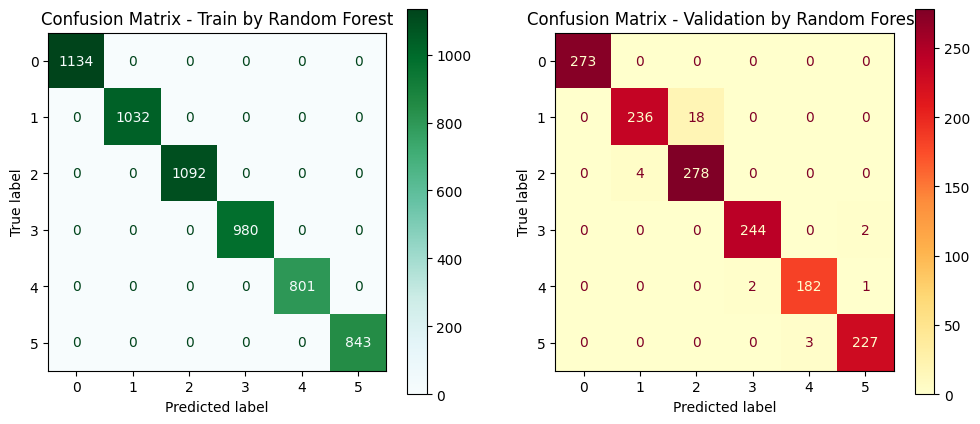

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize= (12,5))

cm_train_forest = confusion_matrix(target, target_pred_forest)
disp_train_forest = ConfusionMatrixDisplay(confusion_matrix=cm_train_forest)
disp_train_forest.plot(cmap='BuGn', ax=ax[0])
ax[0].set_title("Confusion Matrix - Train by Random Forest")

cm_val_forest = confusion_matrix(target_val, target_pred_forest_val)
disp_val_forest = ConfusionMatrixDisplay(confusion_matrix=cm_val_forest)
disp_val_forest.plot(cmap='YlOrRd', ax=ax[1])
ax[1].set_title("Confusion Matrix - Validation by Random Forest")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌بینی برای مجموعه‌ی آزمون</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون از مدلی که آموزش داده‌اید برای پیش‌بینی نمونه‌های مجموعه‌ی آزمون استفاده کرده تا متوجه شوید که مدل شما تا چه میزان برای نمونه‌های جدید و مشاهده‌نشده موفق عمل می‌کند. نیاز است پیش‌بینی‌های مدل خود را در یک دیتافریم با نام <code>submission</code> که شامل یک ستون به نام <code>Activity_Name</code> است ذخیره کنید. ردیف اول از این دیتافریم، پیش‌بینی مدل شما برای نمونه‌ی نخست و ردیف آخر از آن،‌ پیش‌بینی مدل شما برای نمونه‌ی آخر مجموعه‌ی آزمون است. توجه داشته باشید که مقادیر این ستون باید از جنس دسته‌ای و مشابه با مقادیر آن در مجموعه‌ی آموزشی باشد. یک نمونه‌ی فرضی از دیتافریم شما در جدول زیر نشان داده شده است:
</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <code>Activity_Name</code> |
| :---: |
| Walking |
| Sitting |
| Sitting |
| Walking_Upstairs |
| ... |

</font>
</p>
</center>

In [26]:
groups = []
drop_cols = []

for col in test.columns:
    if col.endswith('-X') or col.endswith('-Y') or col.endswith('-Z'):
        groups.append(col[:-2])

groups = set(groups)

for i in groups:
    col_x = i+'-X'
    col_y = i+'-Y'
    col_z = i+'-Z'
    if col_x in test.columns and col_y in test.columns and col_z in test.columns:
        test[f'{i}_value'] = np.sqrt(test[col_x]**2 + test[col_y]**2 + test[col_z]**2)
        drop_cols.extend([col_x, col_y, col_z])

test.drop(drop_cols, axis=1, inplace=True)
test.shape

(2947, 409)

In [27]:
test_pred_forest = best_model_forest.predict(test)
submission = pd.DataFrame({'Activity_Name': test_pred_forest})
submission.head()

,Activity_Name
0,Standing
1,Walking
2,Standing
3,Walking
4,Laying


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">ارزیابی</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معیاری که برای ارزیابی مدل شما استفاده خواهد شد <code>F1-score</code> نام دارد و آرگومان میانگین‌گیری آن معادل حالت وزن‌دار (<code dir=ltr>average='weighted'</code>) تنظیم خواهد شد. جهت مطالعه‌ی مستندات این کلاس می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>


$$F_1=\frac{tp}{tp+\frac{1}{2}(fp+fn)}$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
جهت کسب امتیاز کامل نیاز است پاسخ شما حداقل مقدار(درصد) <code>96</code> را با توجه به این معیار کسب کند.
<br>
<span style="color:orange"><b>نکته:</b></span>
برای پاسخ‌هایی که عملکردی کمتر از این حد آستانه کسب کنند، امتیاز <code>0</code> منظور می‌شود و برای عملکردهایی بهتر از این حد آستانه،‌ به همان میزان، نمره‌ی اضافه برای این بخش در نظر گرفته خواهد شد.
<br>
<span style="color:orange"><b>نکته:</b></span>
از ذخیره بودن نت‌بوک خود در ارسال نهایی اطمینان حاصل کنید زیرا که نت‌بوک شما نیز مورد داوری دستی قرار خواهد گرفت و نمره‌ی نهایی شما از ترکیب نمره‌ی پیش‌بینی مدل و نمره‌ی داوری دستی (راه‌حل و تحلیل) محاسبه خواهد شد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [28]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['human_activity_classification.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['human_activity_classification.ipynb', 'submission.csv']
